In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from arch.unitroot import DFGLS # For ERS unti root testing
import statsmodels.api as sm
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_model import ARIMA

# Importing data

In [9]:
def read_data(path):
    return pd.read_excel(path)

In [10]:
path='./data/african-economic-outlook-january-2019.xlsx'

In [11]:
data=read_data(path)

In [12]:
data.head(4)

,Country and Regions,Country and Regions Name,Country and Regions - RegionId,Indicators,Indicators Name,Scale,Units,1980,1981,1982,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,DZA,Algeria,DZ,NY.GDP.MKTP.KD.ZG,Real GDP growth (annual %),units,percentage,NaN,3.000005,6.400001,...,2.900000,3.400000,2.800000,3.800000,3.700000,3.200000,1.400000,2.544479,2.689753,1.867171
1,DZA,Algeria,DZ,NY.GDP.PCAP.KD.ZG,Real per Capita GDP Growth Rate (annual %),units,percentage,NaN,-0.129448,3.131644,...,0.938334,1.345839,0.728063,1.743944,1.727994,1.333212,-0.347560,0.860358,1.075350,0.329201
2,DZA,Algeria,DZ,NY.GDP.MKTP.KD,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,34512.329728,35547.701326,37822.754445,...,82306.010060,85104.414402,87487.338005,90811.856849,94171.895553,97185.396210,98545.991757,101053.473884,103771.562863,105709.155649
3,DZA,Algeria,DZ,NY.GDP.MKTP.CD,"Gross domestic product, current prices (curren...",millions,U.S. dollars,42345.827687,44371.759808,44779.983360,...,200019.103013,209059.083118,209755.003251,213809.978239,165967.810237,160132.094556,167552.812075,181354.494429,187422.917508,193705.489155


In [13]:
data.index=data["Country and Regions Name"] 
data.drop(["Country and Regions Name", "Country and Regions", \
           "Country and Regions - RegionId", "Indicators"], axis='columns', inplace=True)

## Data UEMOA

In [68]:
data_uemoa=data.loc[['Senegal', 'Niger', "Benin", "Burkina Faso", "Cote d'Ivoire", "Guinea-Bissau", "Mali", "Togo"]]
data_uemoa.head(4)

,Indicators Name,Scale,Units,1980,1981,1982,1983,1984,1985,1986,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country and Regions Name,,,,,,,,,,,,,,,,,,,,,
Senegal,Real GDP growth (annual %),units,percentage,NaN,5.069516,7.843065,-5.326393,3.745764,3.283471,3.113340,...,1.761119,4.411197,3.485217,4.311051,6.367044,6.228450,7.153787,7.007386,6.692122,6.907435
Senegal,Real per Capita GDP Growth Rate (annual %),units,percentage,NaN,2.188186,4.751333,-8.126580,0.630881,0.171128,0.007043,...,-1.181955,1.343643,0.430516,1.257678,3.306900,3.232722,4.186355,4.093509,3.827334,4.071337
Senegal,"Gross domestic product, (constant prices US$)",millions,U.S. dollars,2676.418227,2812.099689,3032.654485,2871.123397,2978.668914,3076.472635,3172.253679,...,7118.009067,7431.998470,7691.019770,8022.583556,8533.384953,9064.882560,9713.364944,10394.017907,11089.598223,11855.604999
Senegal,"Gross domestic product, current prices (curren...",millions,U.S. dollars,3503.275471,3176.788640,3109.737075,2774.242875,2705.577242,2962.219616,4189.931800,...,18564.542402,18360.296663,19152.388232,19770.921052,17767.619834,18973.895405,21070.227539,25727.650743,28162.873091,30687.945488


# Analysis of some indicators

## Current US \$  GDP

Text(0.5, 1.0, 'GDP in million current prices US\\$')

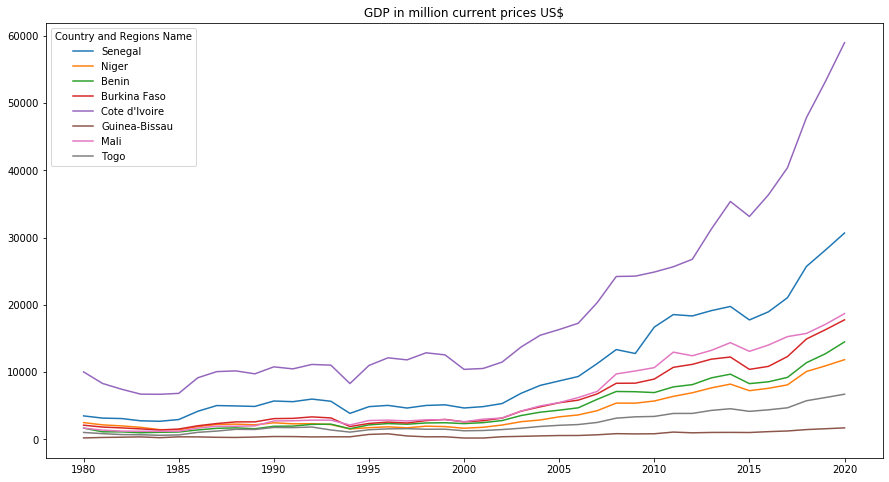

In [15]:
(data_uemoa[data_uemoa["Indicators Name"]=="Gross domestic product, current prices (current US$)"].T).\
iloc[3:].plot(figsize=(15,8))
plt.title("GDP in million current prices US\$")

The GDPs in current prices increase drastically from 2000 up until 2020. Why is there a growth from 2020? --> Maybe foreign investment?
Look at the components of the GDP: household expenditures, government expenditure investment and export and import.

$$ GDP = C + I + G + Exp - Imp $$

## Export

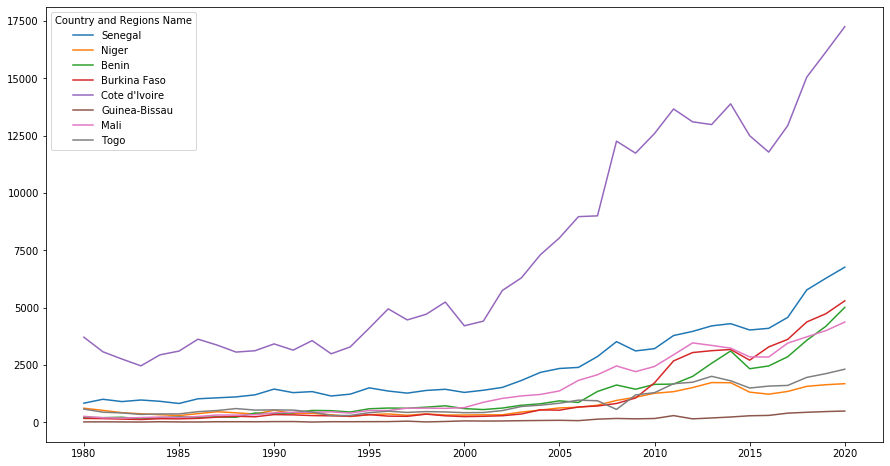

In [16]:
data_uemoa[data_uemoa["Indicators Name"]=="Exports of goods and services (current US$)"].T.iloc[3:].plot(figsize=(15,8))

## Import 

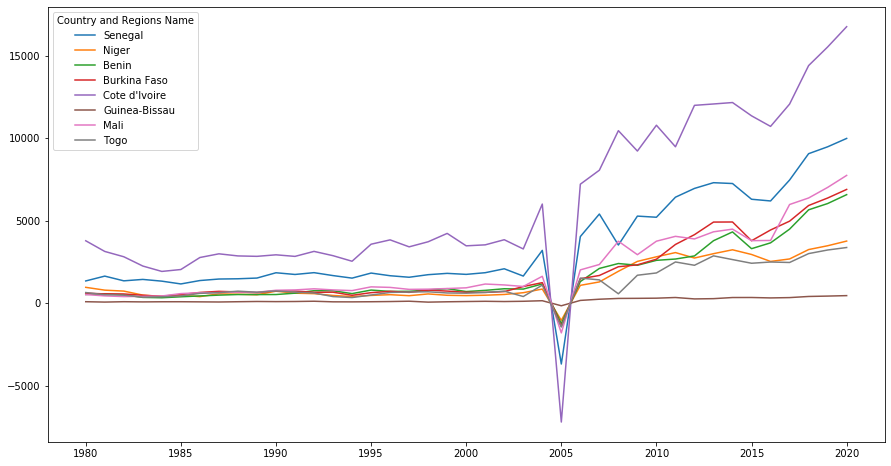

In [17]:
data_uemoa[data_uemoa["Indicators Name"]=="Imports of goods and services (current US$)"].T.iloc[3:].plot(figsize=(15,8))

There is a problem on the data maybe

## Final consumption expenditure (Government+households expenditures)

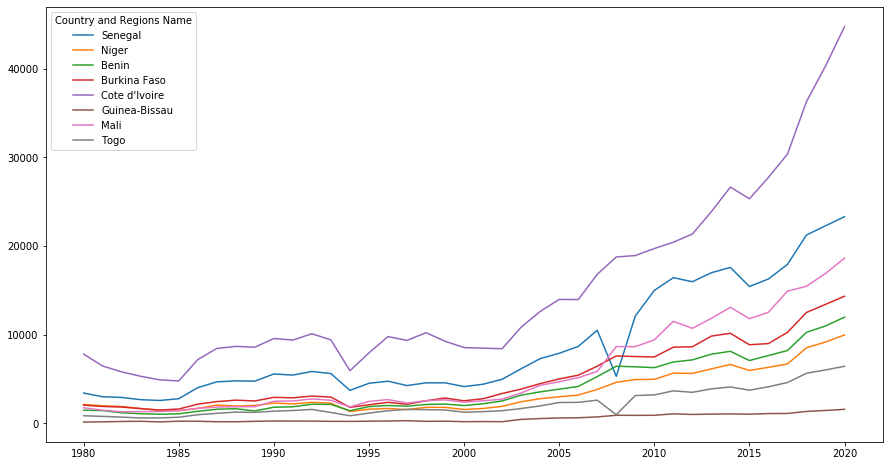

In [18]:
data_uemoa[data_uemoa["Indicators Name"]=="Final consumption expenditure  (current US$)"].T.iloc[3:].plot(figsize=(15,8))

In [19]:
data_uemoa_investment=data_uemoa[data_uemoa["Indicators Name"]=="Gross domestic product, current prices (current US$)"].T.iloc[3:] -\
data_uemoa[data_uemoa["Indicators Name"]=="Final consumption expenditure  (current US$)"].T.iloc[3:] -\
data_uemoa[data_uemoa["Indicators Name"]=="Exports of goods and services (current US$)"].T.iloc[3:] + \
data_uemoa[data_uemoa["Indicators Name"]=="Imports of goods and services (current US$)"].T.iloc[3:]

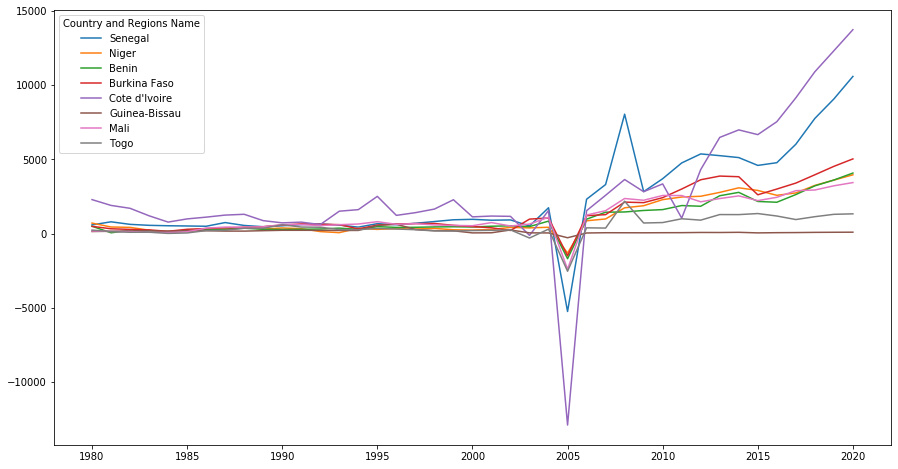

In [20]:
data_uemoa_investment.plot(figsize=(15,8))

The values at 2005 seem to be outliers (problem in the data) so we drop them.

In [74]:
data_uemoa.drop(['2005'], axis = 'columns', inplace=True)

Problem on the data in 2005 maybe. In the case of Senegal there were tax cuts for investments beyond 250 billion CFA introduced in 2007.

## Inflation

Text(0.5, 1.0, 'Inflation')

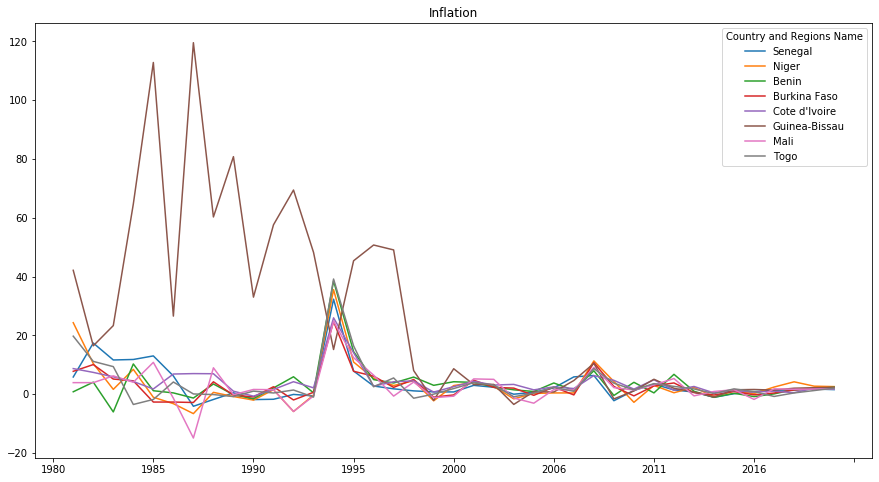

In [75]:
data_uemoa[data_uemoa["Indicators Name"]=="Inflation, consumer prices (annual %)"].T.iloc[3:].plot(figsize=(15,8))
plt.title("Inflation")

Devaluation of 1994 resulted in inflation. But the level of inflation stabilized over time.

# Modelling GDP

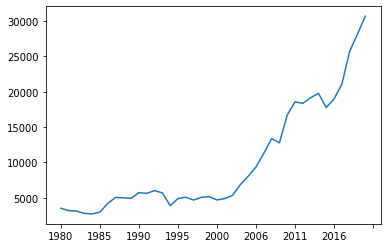

In [76]:
data_sn_gdp=(data_uemoa[data_uemoa["Indicators Name"]=="Gross domestic product, current prices (current US$)"].loc["Senegal"].T).\
iloc[3:]
data_sn_gdp.plot()

## Stationary condition testing: unit root testing

### Test Elliot Rotemberg Stock:

#### Specifying trend argument

In [77]:
y = list(data_sn_gdp)
X = sm.add_constant(range(len(data_sn_gdp)))
print(len(y), len(X))

40 40


In [78]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     135.2
Date:                Tue, 27 Jul 2021   Prob (F-statistic):           4.41e-14
Time:                        17:47:41   Log-Likelihood:                -384.49
No. Observations:                  40   AIC:                             773.0
Df Residuals:                      38   BIC:                             776.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1507.1169   1151.695     -1.309      0.1

There seems to be a trend in the time series.

In [79]:
dfgls = DFGLS(list(y), trend="ct")
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -0.681
P-value                         0.931
Lags                                1
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.97 (1%), -3.32 (5%), -3.00 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


The series seems not to be stationary

#### Transforming the series with direct difference

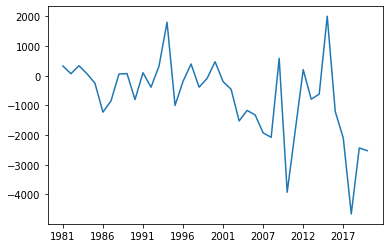

In [80]:
diff_gdp_sn=(data_sn_gdp.shift(1) - data_sn_gdp).dropna()
diff_gdp_sn.plot()

In [81]:
y_diff= list(diff_gdp_sn)
model = sm.OLS(y_diff, X[1:, :])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     11.80
Date:                Tue, 27 Jul 2021   Prob (F-statistic):            0.00148
Time:                        17:47:43   Log-Likelihood:                -329.95
No. Observations:                  39   AIC:                             663.9
Df Residuals:                      37   BIC:                             667.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        449.5624    383.080      1.174      0.2

In [82]:
dfgls_diff = DFGLS(list(diff_gdp_sn), trend="ct")
print(dfgls_diff.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -5.132
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.97 (1%), -3.32 (5%), -3.00 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


The differenced series seems stationary

#### Transforming the series with logarithm first and differencing after

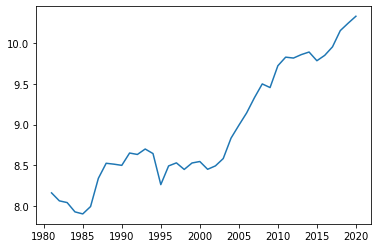

In [83]:
log_gdp = np.log(list(data_sn_gdp))
plt.plot(range(1981, 1981+len(log_gdp)), log_gdp)

Text(0.5, 1.0, 'GDP in US $\\$$ current prices growth for Senegal')

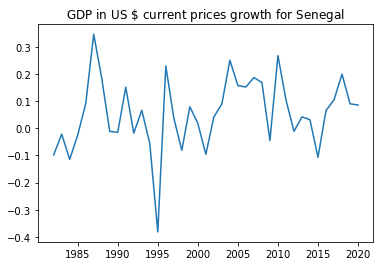

In [84]:
gdp_growth_sn=(np.roll(log_gdp, -1) - log_gdp)[:-1]
plt.plot(range(1982,1982+len(gdp_growth_sn)), gdp_growth_sn)
plt.title("GDP in US $\$$ current prices growth for Senegal")

Text(0.5, 1.0, 'Real GDP growth for Senegal')

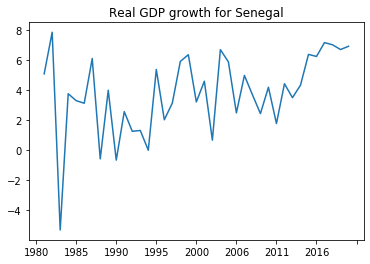

In [85]:
(data_uemoa[data_uemoa["Indicators Name"]=="Real GDP growth (annual %)"].loc["Senegal"].T).\
iloc[3:].plot()
plt.title("Real GDP growth for Senegal")

In [86]:
y_log_diff= list(gdp_growth_sn)
model = sm.OLS(y_log_diff, X[1:, :])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.738
Date:                Tue, 27 Jul 2021   Prob (F-statistic):              0.195
Time:                        17:47:47   Log-Likelihood:                 24.708
No. Observations:                  39   AIC:                            -45.42
Df Residuals:                      37   BIC:                            -42.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0062      0.043      0.144      0.8

In [87]:
dfgls_log_diff = DFGLS(list(gdp_growth_sn), trend="c")
print(dfgls_log_diff.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -2.190
P-value                         0.029
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -3.04 (1%), -2.39 (5%), -2.09 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


The series seems to be stationary

### Modelling the differenced series

#### ARMA(p,q) modelling

##### Autocorrelation function

Text(0.5, 1.0, 'Autocorrelation')

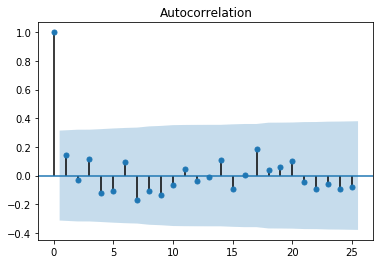

In [91]:
plot_acf(gdp_growth_sn, lags=25)
plt.title("Autocorrelation")

Text(0.5, 1.0, 'Partial Autocorrelation')

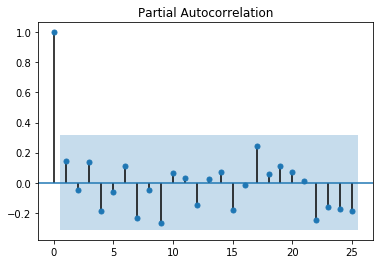

In [90]:
plot_pacf(gdp_growth_sn, lags=25)
plt.title("Partial Autocorrelation")

It seems what happened during the 25 past years does not affect very much the present.

ARMA model: $$y_t - a_1 y_{t-1} -a_2 y_{t-2} - ... - a_p y_{t-p} = \epsilon_t + b_1 \epsilon_{t-1} + ...+ b_q \epsilon_{t-q} $$

Our GDP growth seems to be a white noise so an ARMA(0,0), so the log GDP in current US $\$$ price is an ARIMA(0,1,0)

### Prediction